In [ ]:
!git clone https://github.com/ICESat2-SlideRule/sliderule-python.git

In [ ]:
ls-l

In [2]:
import numpy as np
import time
from datetime import datetime, timedelta
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer, CRS
from shapely.geometry import Polygon, Point
from sliderule import sliderule
from sliderule import icesat2
from pyproj import Transformer, CRS
import requests
import ipyleaflet
from ipyleaflet import Map, GeoData, LayersControl,Rectangle, basemaps, basemap_to_tiles, TileLayer, SplitMapControl, Polygon

In [3]:
icesat2.init("icesat2sliderule.org", verbose=True)

In [4]:
spatialExtent = icesat2.toregion('PBay_GeoJSON.geojson')["poly"]

In [ ]:
!cd sliderule-python

In [ ]:
pwd


In [3]:
cd sliderule-python

/home/jovyan/Wes_tmp/sliderule-python


In [4]:
!conda env create -f environment.yml

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



hdf4-4.2.15          | 950 KB    | ##################################### | 100% 
libnghttp2-1.47.0    | 808 KB    | ##################################### | 100% 
pandas-1.4.1         | 13.3 MB   | ##################################### | 100% 
boost-cpp-1.74.0     | 16.3 MB   | ##################################### | 100% 
dbus-1.13.6          | 604 KB    | ##################################### | 100% 
python_abi-3.8       | 4 KB      | ##################################### | 100% 
networkx-2.7.1       | 1.5 MB    | ##################################### | 100% 
libxkbcommon-1.0.3   | 581 KB    | ##################################### | 100% 
nss-3.76             | 2.1 MB    | ##################################### | 100% 
nbclient-0.5.13      | 64 KB     | ##################################### 

In [ ]:
ls -l

In [14]:
cd /home/jovyan/Wes_tmp

/home/jovyan/Wes_tmp


In [7]:
spatialExtent = icesat2.toregion('map.geojson')["poly"]

In [8]:
# create polygon for plotting
polygon = Polygon(
    locations=spatialExtent,
    color="green"
)

In [9]:
center = [spatialExtent[0]['lat'], spatialExtent[0]['lon']]
zoom = 8
m = Map(basemap=basemaps.Esri.WorldImagery, center=center, zoom=zoom)
m.add_layer(polygon);
m

Map(center=[69.32607888625137, -152.16064453124997], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [10]:
%%time

# build sliderule parameters for ATL03 subsetting request
# SRT_LAND = 0
# SRT_OCEAN = 1
# SRT_SEA_ICE = 2
# SRT_LAND_ICE = 3
# SRT_INLAND_WATER = 4
parms = {
    # processing parameters
 #   "srt": icesat2.SRT_LAND,
    "srt": icesat2.SRT_LAND,
    "len": 20,
    # classification and checks
    # still return photon segments that fail checks
    "pass_invalid": True, 
    # all photons
    "cnf": -2, 
    # all land classification flags
    "atl08_class": ["atl08_noise", "atl08_ground", "atl08_canopy", "atl08_top_of_canopy", "atl08_unclassified"],
    # all photons
    "yapc": dict(knn=0, win_h=2, win_x=6, min_ph=4, score=0), 
}

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 8.58 µs


In [11]:
# Set ICESat-2 data asset
asset = "nsidc-s3"

# ICESat-2 data release
release = '005'

# time bounds for CMR query
time_start = '2019-07-10'
time_end = '2019-07-20'

In [12]:
# find granule for each region of interest
granules_list = icesat2.cmr(polygon=spatialExtent, time_start=time_start, time_end=time_end, version=release)

# create an empty geodataframe
parms["poly"] = spatialExtent

# write output into geodataframe
gdf = icesat2.atl03sp(parms, asset=asset, version=release, resources=granules_list)

INFO:sliderule.icesat2:Allocating 21 workers across 7 processing nodes
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://34.211.113.118/source/atl03s ... retrying request
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://18.237.166.164/source/atl03s ... retrying request
CRITICAL:sliderule.sliderule:http://34.211.113.118 encountered consecutive error 1
CRITICAL:sliderule.sliderule:http://18.237.166.164 encountered consecutive error 1
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://18.237.166.164/source/atl03s ... retrying request
CRITICAL:sliderule.sliderule:http://18.237.166.164 encountered consecutive error 2
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://18.237.166.164/source/atl03s ... retrying request
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://34.221.248.245/source/atl03s ... retrying request
CRITICAL:sliderule.s

KeyboardInterrupt: 

ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://54.202.55.133/source/atl03s ... retrying request
CRITICAL:sliderule.sliderule:http://54.202.55.133 encountered consecutive error 1
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://18.236.203.243/source/atl03s ... retrying request
CRITICAL:sliderule.sliderule:http://18.236.203.243 encountered consecutive error 1
ERROR:sliderule.sliderule:Unexpected termination of response from endpoint http://52.41.70.7/source/atl03s ... retrying request
CRITICAL:sliderule.sliderule:http://52.41.70.7 encountered consecutive error 2


In [59]:
# look at the resulting geodataframe
gdf.head()

,cycle,segment_dist,segment_id,track,rgt,sc_orient,quality_ph,delta_time,height,atl03_cnf,yapc_score,atl08_class,distance,pair,geometry
time,,,,,,,,,,,,,,,
2019-07-14 01:41:43.864015240,4,1.286611e+07,642346,3,244,0,0,4.830370e+07,167.423950,0,0,4,-8.519688,0,POINT (-162.95389 64.62952)
2019-07-14 01:41:43.864015240,4,1.286611e+07,642346,3,244,0,0,4.830370e+07,-271.506531,0,1,4,3.715942,0,POINT (-162.95393 64.62941)
2019-07-14 01:41:43.864015240,4,1.286611e+07,642346,3,244,0,0,4.830370e+07,-0.217391,0,0,4,-3.846664,0,POINT (-162.95390 64.62948)
2019-07-14 01:41:43.864015240,4,1.286611e+07,642346,3,244,0,0,4.830370e+07,-187.967499,0,0,4,1.387081,0,POINT (-162.95392 64.62943)
2019-07-14 01:41:43.864015240,4,1.286611e+07,642346,3,244,0,0,4.830370e+07,-216.398285,0,0,4,2.179764,0,POINT (-162.95393 64.62943)


In [37]:
# get unique RGTs
rgtValues = gdf['rgt'].unique()
rgtValues.sort()
print(rgtValues)

[244 305]


In [38]:
#get unique cycles
Tracks = gdf['track'].unique()
Tracks.sort()
print (Tracks)

[1 2 3]


In [ ]:
print (whiteMountain)

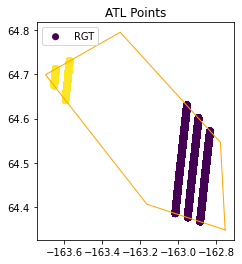

In [14]:
f, ax = plt.subplots()
ax.set_title("ATL Points")
ax.set_aspect('equal')
# FIX THIS TO SHOW EACH RGT value by color
gdf.plot(ax=ax, column='rgt', label="RGT")
ax.legend(loc="upper left")
# Prepare coordinate lists for plotting the region of interest polygon
region_lon = [e["lon"] for e in spatialExtent]
region_lat = [e["lat"] for e in spatialExtent]
ax.plot(region_lon, region_lat, linewidth=1, color='orange');

In [39]:
geo_data = GeoData(geo_dataframe = gdf.sample(n=1000, replace=False, random_state=1),
#    style={'color': 'red', 'radius':1, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    style={'color': 'red', 'radius':1},
#    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
#    point_style={'radius': 1, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    point_style={'radius': 1, 'color': 'red', 'fillOpacity': 0.8},
    name = 'rgt')
m2 = m
m2.add_layer(geo_data)

In [40]:
m2

Map(bottom=17533.0, center=[64.34823209154665, -162.75421142578125], controls=(ZoomControl(options=['position'…

In [60]:
#Reduce GeoDataFrame to plot a single beam
def reduce_dataframe(gdf, RGT=None, GT=None, track=None, pair=None, cycle=None, beam='', crs=4326):
    # convert coordinate reference system
    D3 = gdf.to_crs(crs)
    # reduce to reference ground track
    if RGT is not None:
        D3 = D3[D3["rgt"] == RGT]
    # reduce to ground track (gt[123][lr]), track ([123]), or pair (l=0, r=1) 
    gtlookup = {icesat2.GT1L: 1, icesat2.GT1R: 1, icesat2.GT2L: 2, icesat2.GT2R: 2, icesat2.GT3L: 3, icesat2.GT3R: 3}
    pairlookup = {icesat2.GT1L: 0, icesat2.GT1R: 1, icesat2.GT2L: 0, icesat2.GT2R: 1, icesat2.GT3L: 0, icesat2.GT3R: 1}
    if GT is not None:
        D3 = D3[(D3["track"] == gtlookup[GT]) & (D3["pair"] == pairlookup[GT])]
    if track is not None:
        D3 = D3[D3["track"] == track]
    if pair is not None:
        D3 = D3[D3["pair"] == pair]
    # reduce to weak or strong beams
    # tested on cycle 11, where the strong beam in the pair matches the spacecraft orientation.
    # Need to check on other cycles
    if (beam == 'strong'):
        D3 = D3[D3['sc_orient'] == D3['pair']]
    elif (beam == 'weak'):
        D3 = D3[D3['sc_orient'] != D3['pair']]
    # reduce to cycle
    if cycle is not None:
        D3 = D3[D3["cycle"] == cycle]
    # otherwise, return both beams
    return D3

In [61]:
D3 = reduce_dataframe(gdf, cycle=4, RGT=244, track=1, beam='strong', crs=4326)

In [62]:
D3["atl08_class"].value_counts()

4    233306
1     33367
0      5574
2      2305
3       793
Name: atl08_class, dtype: int64

In [63]:
def plot_atl08(df):
 plt.figure(figsize=[8,6])

 colors={0:['gray', 'noise'], 
        4:['pink','unclassified'],  
        2:['green','canopy'], 
        3:['lime', 'canopy_top'], 
        1:['brown', 'ground']}
 d0=np.min(df['segment_dist'])
 for class_val, color_name in colors.items():
    ii=df['atl08_class']==class_val
    plt.plot(df['segment_dist'][ii]+df['distance'][ii]-d0, df['height'][ii],'o', 
         markersize=1, color=color_name[0], label=color_name[1])
 hl=plt.legend(loc=3, frameon=False, markerscale=5)
 #plt.gca().set_xlim([26000, 30000])
 #plt.gca().set_ylim([2950, 3150])

 plt.ylabel('height, m')
 plt.xlabel('$x_{ATC}$, m');

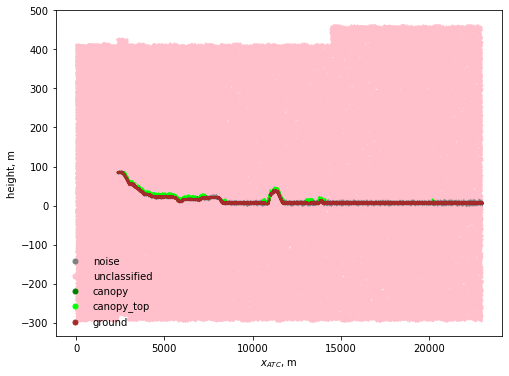

In [64]:
plot_atl08(D3)

In [54]:
D3 = reduce_dataframe(gdf, cycle=4, RGT=305, track=1, beam='strong', crs=4326)

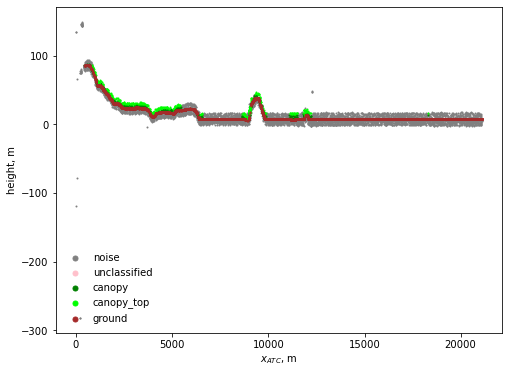

In [65]:
# Class 0 is noise and Class 4 is unclassified
# Lets get rid of the unclassified
plot_atl08(D3[D3["atl08_class"] != 4])

In [2]:
a = 2

In [3]:
print (a)

2


In [23]:
def plot_yapc(df, vmin=100, vmax=255):
    plt.figure(figsize=[10,6])

    d0=np.min(df['segment_dist'])
    ii=np.argsort(df['yapc_score'])
    plt.scatter(df['segment_dist'][ii]+df['distance'][ii]-d0,
        df['height'][ii],2, c=df['yapc_score'][ii],
        vmin=vmin, vmax=vmax, cmap='plasma_r')
    plt.colorbar(label='YAPC score')
    #plt.gca().set_xlim([26000, 30000])
    #plt.gca().set_ylim([2950, 3150])

    plt.ylabel('height, m')
    plt.xlabel('$x_{ATC}$, m');

In [25]:
plot_yapc(D3)
plot_yapc(D3, !=4)

SyntaxError: invalid syntax (45665504.py, line 2)

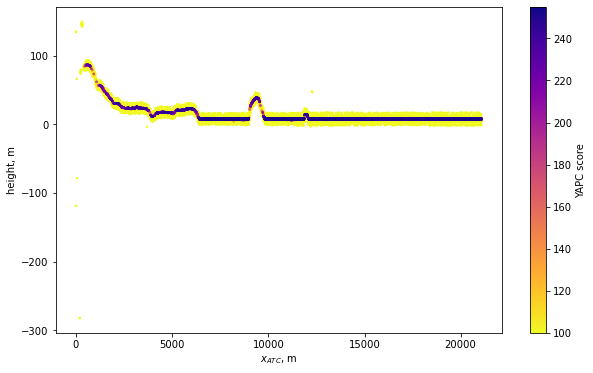

In [66]:
plot_yapc(D3[D3["atl08_class"] !=4])

In [27]:
print (parms)

{'srt': 0, 'len': 20, 'pass_invalid': True, 'cnf': -2, 'atl08_class': ['atl08_noise', 'atl08_ground', 'atl08_canopy', 'atl08_top_of_canopy', 'atl08_unclassified'], 'yapc': {'knn': 0, 'win_h': 6, 'win_x': 11, 'min_ph': 4, 'score': 0}, 'poly': [{'lon': -162.75421142578125, 'lat': 64.34823209154665}, {'lon': -162.77893066406247, 'lat': 64.54607936653424}, {'lon': -163.3062744140625, 'lat': 64.79518717004242}, {'lon': -163.69903564453122, 'lat': 64.69910544204765}, {'lon': -163.16619873046875, 'lat': 64.4064312702572}, {'lon': -162.75421142578125, 'lat': 64.34823209154665}]}


In [4]:
cp /home/jovyan/coastal_topobathy/DataDownload/PBay_GeoJSON.geojson /home/jovyan/Wes_tmp

In [ ]:
activate sliderule

SyntaxError: invalid syntax (3052261572.py, line 1)

In [1]:
conda activate sliderule


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [5]:
pwd

'/home/jovyan/Wes_tmp/sliderule-python'

In [6]:
cd /home/jovyan/Wes_tmp

/home/jovyan/Wes_tmp
